In [0]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [0]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C 
    dIdt = delta * epsilon * E - (1-alpha) * gamma * I - rho * alpha * I
    dRdt =lambda1 * C + (1-alpha) * gamma * I          
    dDdt = rho * alpha * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [0]:

N = 1352600000
D = 20.0               #infections lasts days
gamma = 1.0 / D
delta = 1/5.1      # incubation period of five days
epsilon = 0.9          # being a symptomatic and (1-epsilon) asymptomatic
R_0 = 5.0
beta = R_0 * gamma     # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.033         # death rate
rho = 1/9             # 30 days from infection until death
phi = 1.0 / 5.0         # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0    # 7 days infection period
S0, E0, C0, I0, R0, D0 = N-31-1000-5000000, 5000000, 1000, 31, 0, 0    # initial conditions of 3 march.

In [18]:

t = np.linspace(0, 30, 30)     # Grid of time points (in days)
y0 = S0, E0, C0, I0, R0, D0      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1))
S, E, C, I, R, D = ret.T
print(D)

[     0.            355.0155934    1336.62188578   2839.85012766
   4782.09744396   7098.5579051    9738.59278705  12662.84741035
  15840.96106965  19249.74844035  22871.75556338  26694.11348234
  30707.62840391  34906.05978596  39285.54776942  43844.15933241
  48581.52870121  53498.57275805  58597.26597351  63880.46278691
  69351.75753906  75015.37440899  80876.08113044  86939.12166704
  93210.1639543   99695.25964323 106400.81341175 113333.55987833
 120500.54660416 127909.12197113]


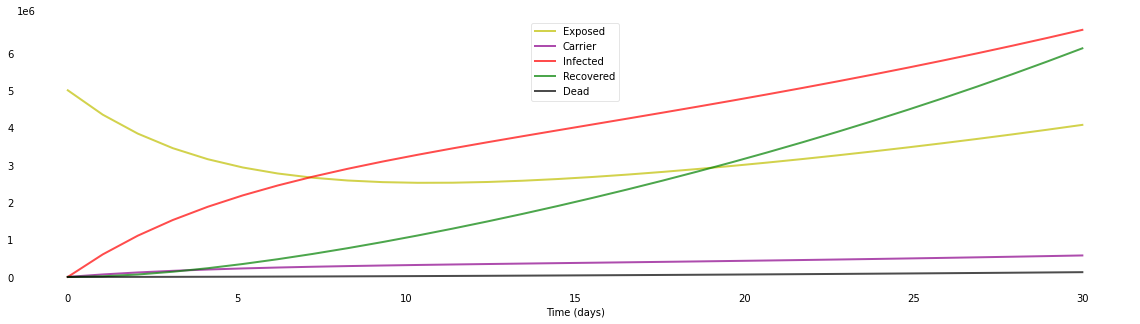

In [21]:
f, ax = plt.subplots(1,1,figsize=(20,5))
# ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
# ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

ax.set_xlabel('Time (days)')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();